In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [12]:
df_activity = pd.read_csv('takehome_user_engagement.csv')
df_activity.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [99]:
print(df_activity['user_id'].nunique())
df_activity['time_stamp'] = pd.to_datetime(df_activity['time_stamp'])
df_activity.info()
df_activity['date'] = pd.to_datetime(df_activity['time_stamp'].dt.date)
df_activity.head()

8823
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
 3   date        207917 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 6.3 MB


,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [103]:
df_activity.sort_values(['user_id', 'date'])

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06
207913,2013-01-15 18:28:37,11997,1,2013-01-15
207914,2014-04-27 12:45:16,11998,1,2014-04-27
207915,2012-06-02 11:55:59,11999,1,2012-06-02


In [127]:
df_activity[df_activity['user_id'] == 2]['date'].iloc[0]

Timestamp('2013-11-15 00:00:00')

In [122]:
len(df_activity[df_activity['user_id'] == 2])

14

In [116]:
df_activity['adopted'] = 0
df_activity.loc[df_activity['user_id'] == 2, 'adopted'] = 0
df_activity

,time_stamp,user_id,visited,date,adopted
0,2014-04-22 03:53:30,1,1,2014-04-22,0
1,2013-11-15 03:45:04,2,1,2013-11-15,0
2,2013-11-29 03:45:04,2,1,2013-11-29,0
3,2013-12-09 03:45:04,2,1,2013-12-09,0
4,2013-12-25 03:45:04,2,1,2013-12-25,0
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,0
207914,2014-04-27 12:45:16,11998,1,2014-04-27,0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,0


In [125]:
for x in range(5):
    print(x)

0
1
2
3
4


In [128]:
for i in range(1,12001):
    cur_df = df_activity[df_activity['user_id'] == i]
    if cur_df.shape[0] ==0:
        pass
    elif cur_df.shape[0] > 0:
        for x in range(cur_df.shape[0]):
            end_date = cur_df['date'].iloc[x] + pd.Timedelta(days=7)
            cur_date = cur_df['date'].iloc[x]
            date_range_df = cur_df[(cur_df['date'] >= cur_date) & (cur_df['date'] <= end_date)]
            if date_range_df['date'].nunique() >= 3:
                df_activity.loc[df_activity['user_id'] == i, 'adopted'] = 1
                break
            else: pass

In [132]:
df_activity.head(20)


,time_stamp,user_id,visited,date,adopted
0,2014-04-22 03:53:30,1,1,2014-04-22,0
1,2013-11-15 03:45:04,2,1,2013-11-15,1
2,2013-11-29 03:45:04,2,1,2013-11-29,1
3,2013-12-09 03:45:04,2,1,2013-12-09,1
4,2013-12-25 03:45:04,2,1,2013-12-25,1
5,2013-12-31 03:45:04,2,1,2013-12-31,1
6,2014-01-08 03:45:04,2,1,2014-01-08,1
7,2014-02-03 03:45:04,2,1,2014-02-03,1
8,2014-02-08 03:45:04,2,1,2014-02-08,1
9,2014-02-09 03:45:04,2,1,2014-02-09,1


In [130]:
df_activity[df_activity['adopted'] ==1]['user_id'].nunique()

1656

In [135]:
df_users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [136]:
df_users.shape

(12000, 10)

In [190]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [137]:
df_users.rename(columns={'object_id': 'user_id'}, inplace=True)

In [155]:
df_new = df_users.merge(df_activity, how='left', on='user_id')

In [158]:
df_new.head(10)
# df_new['user_id'].nunique()
df_new.shape

(211094, 14)

In [168]:
df_final = df_new.drop_duplicates(subset='user_id')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 0 to 211093
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  time_stamp                  8823 non-null   datetime64[ns]
 11  visited                     8823 non-null   float64       

In [194]:
df_final.drop(columns=['date', 'visited', 'time_stamp'], inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 0 to 211093
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     8823 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


/var/folders/k7/_jdxw9bx3_7cybsnkxz0pr200000gn/T/ipykernel_18227/427098479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['date', 'visited', 'time_stamp'], inplace=True)


In [196]:
df_final['last_session_creation_time'].fillna(0, inplace=True)
df_final['invited_by_user_id'].fillna(0, inplace=True)
df_final['adopted'].fillna(0, inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 0 to 211093
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  adopted                     12000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


/var/folders/k7/_jdxw9bx3_7cybsnkxz0pr200000gn/T/ipykernel_18227/3646622254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['last_session_creation_time'].fillna(0, inplace=True)
/var/folders/k7/_jdxw9bx3_7cybsnkxz0pr200000gn/T/ipykernel_18227/3646622254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['invited_by_user_id'].fillna(0, inplace=True)
/var/folders/k7/_jdxw9bx3_7cybsnkxz0pr200000gn/T/ipykernel_18227/3646622254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ORG_INVITE'),
  Text(1, 0, 'GUEST_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'SIGNUP_GOOGLE_AUTH'),
  Text(4, 0, 'PERSONAL_PROJECTS')])

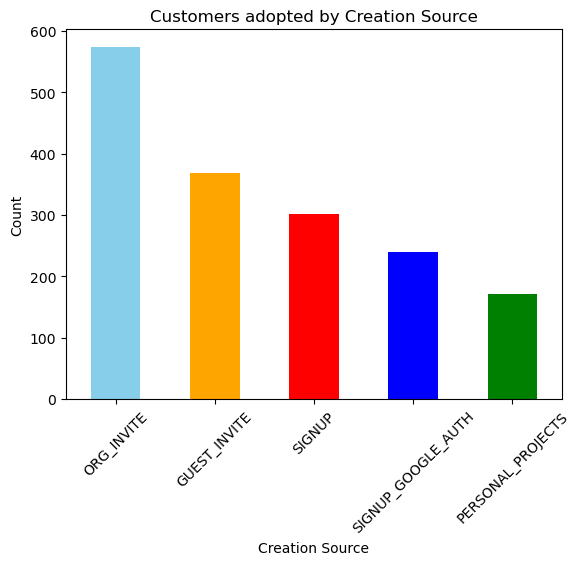

In [216]:
adopted_df = df_final[df_final['adopted'] == 1]
adopted_df['creation_source'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'red', 'blue', 'green'])
plt.title('Customers adopted by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.xticks(rotation=45)

(array([  12.,   31.,   30.,   39.,   50.,   45.,   45.,   47.,   53.,
        1304.]),
 array([1.34124414e+09, 1.34731234e+09, 1.35338055e+09, 1.35944875e+09,
        1.36551696e+09, 1.37158516e+09, 1.37765337e+09, 1.38372157e+09,
        1.38978978e+09, 1.39585798e+09, 1.40192619e+09]),
 <BarContainer object of 10 artists>)

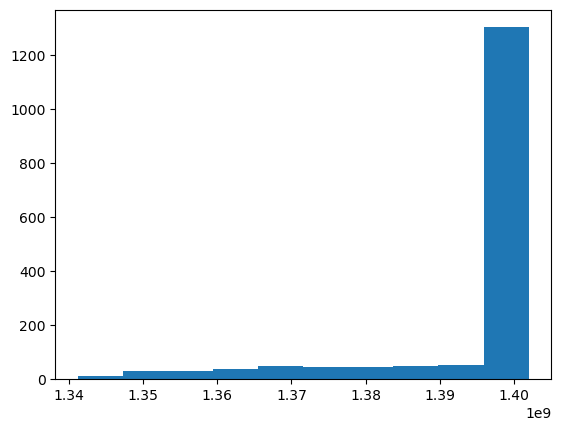

In [217]:
plt.hist(adopted_df['last_session_creation_time'])

<Axes: xlabel='opted_in_to_mailing_list'>

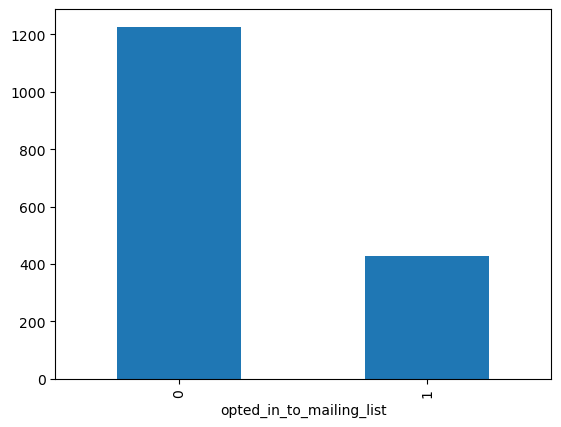

In [221]:
adopted_df['opted_in_to_mailing_list'].value_counts().plot(kind='bar')

<Axes: xlabel='enabled_for_marketing_drip'>

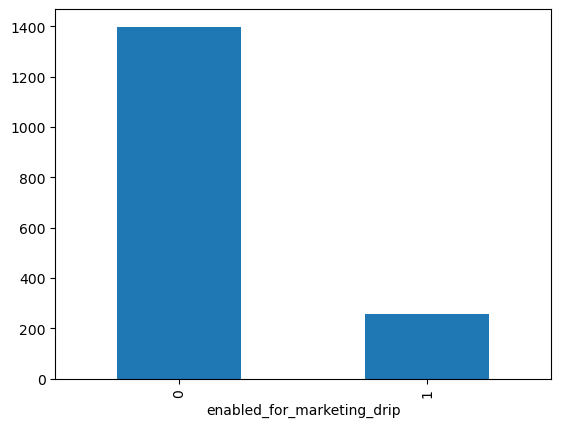

In [222]:
adopted_df['enabled_for_marketing_drip'].value_counts().plot(kind='bar')

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [201]:
X = df_final.drop(columns=['adopted'])
y = df_final['adopted']
X = pd.get_dummies(X, drop_first=True)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [203]:
rf_model = RandomForestClassifier()

In [204]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
y_pred = rf_model.predict(X_test)

In [209]:
print(accuracy_score(y_test, y_pred))

0.9116666666666666


In [208]:
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
print(feature_importances.sort_values(ascending=False))

last_session_creation_time                 0.279603
org_id                                     0.009341
user_id                                    0.007416
invited_by_user_id                         0.004607
creation_source_PERSONAL_PROJECTS          0.002333
                                             ...   
creation_time_2013-01-28 08:34:03          0.000000
name_Mahler Anja                           0.000000
email_JenniferPCarpenter@gustr.com         0.000000
name_Magee Stanley                         0.000000
email_LeonardoFerreiraCorreia@gmail.com    0.000000
Length: 35338, dtype: float64


In [191]:
df_final_dropped = df_final.dropna()
df_final_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4776 entries, 0 to 211091
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     4776 non-null   int64         
 1   creation_time               4776 non-null   object        
 2   name                        4776 non-null   object        
 3   email                       4776 non-null   object        
 4   creation_source             4776 non-null   object        
 5   last_session_creation_time  4776 non-null   float64       
 6   opted_in_to_mailing_list    4776 non-null   int64         
 7   enabled_for_marketing_drip  4776 non-null   int64         
 8   org_id                      4776 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  time_stamp                  4776 non-null   datetime64[ns]
 11  visited                     4776 non-null   float64       


In [193]:
df_final_dropped['adopted'].value_counts()

adopted
0.0    3833
1.0     943
Name: count, dtype: int64

In [170]:
# df_test.head()

In [171]:
# df_test = df_new.groupby('name')

In [172]:
# df_test = df_new[['time_stamp', 'user_id', 'name']]

In [173]:
# df_test['time_stamp'] = pd.to_datetime(df_test['time_stamp'])

In [174]:
# df_test.info()

In [175]:
# df_test['date'] = df_test['time_stamp'].dt.date

In [176]:
# df_test.info()

In [177]:
# df_test.head()

In [178]:
# df_test = df_test[['name', 'date']]
# df_test.sort_values('name')

In [179]:
# logins = df_test.groupby('name')['date'].nunique().sort_values(ascending=False)

In [180]:
# logins.values.sum()

In [181]:
# logins

In [182]:
# adopted_users = np.array(logins[logins >=3].keys())

In [183]:
# len(adopted_users)

In [184]:
# df_users.head()

In [185]:
# df_users['adopted'] = df_users['name'].isin(adopted_users).astype(int)
# df_users.head()